In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
def corr_plot (data):
    corr = data.corr()
    sns.set(rc={"figure.dpi":150, 'savefig.dpi':300})
    ax = sns.heatmap(
        corr, 
        vmin=-1, vmax=1, center=0,
        annot=True, annot_kws={"fontsize":6},
        cmap=sns.diverging_palette(20, 220, n=200),
        square=False
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
    );

# First Dataset

In [3]:
cleveland = pd.read_csv('processed.cleveland.data', sep=";")
cleveland = pd.read_csv('processed.cleveland.data', sep=",",header=None)
cleveland = cleveland.rename(columns={0: 'age',
                        1: 'sex',
                        2: 'chest_pain',
                        3: 'trestbps',
                        4: 'serum_cholestoral',
                        5: 'fasting_blood_sugar',
                        6: 'resting_electrocardiographic_results',
                        7: 'maximum_heart_rate',
                        8: 'exercise_induced_angina',
                        9: 'oldpeak',
                        10: 'slope_of_peak_exercise',
                        11: 'number_of_major_vessels',
                        12: 'thal',
                        13: 'num'})
cleveland.drop( cleveland[ cleveland['number_of_major_vessels'] == '?' ].index, inplace=True)
cleveland.drop( cleveland[ cleveland['thal'] == '?' ].index, inplace=True)

In [4]:
loc = 0
for value in cleveland['number_of_major_vessels']:
    if value == '?':
        print('found at ', loc)
    loc += 1

In [5]:
loc = 0
for value in cleveland['thal']:
    if value == '?':
        print('found at ', loc)
    loc += 1

In [6]:
cleveland['number_of_major_vessels'] = pd.to_numeric(cleveland['number_of_major_vessels'])

In [7]:
cleveland['thal'] = pd.to_numeric(cleveland['thal'])

In [8]:
cleveland = cleveland.reset_index(drop=True)

In [9]:
cleveland.dtypes

age                                     float64
sex                                     float64
chest_pain                              float64
trestbps                                float64
serum_cholestoral                       float64
fasting_blood_sugar                     float64
resting_electrocardiographic_results    float64
maximum_heart_rate                      float64
exercise_induced_angina                 float64
oldpeak                                 float64
slope_of_peak_exercise                  float64
number_of_major_vessels                 float64
thal                                    float64
num                                       int64
dtype: object

<AxesSubplot:>

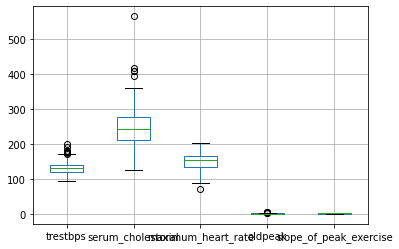

In [10]:
#check outlier
numerics_col = ['trestbps','serum_cholestoral', 'maximum_heart_rate', 'oldpeak', 'slope_of_peak_exercise']
cleveland.boxplot(numerics_col)

#Outlier found!!

In [11]:
#removing outlier
for x in ['trestbps']:
    q75,q25 = np.percentile(cleveland.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    cleveland.loc[cleveland[x] < min,x] = np.nan
    cleveland.loc[cleveland[x] > max,x] = np.nan
    
for x in ['serum_cholestoral']:
    q75,q25 = np.percentile(cleveland.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    cleveland.loc[cleveland[x] < min,x] = np.nan
    cleveland.loc[cleveland[x] > max,x] = np.nan
    
for x in ['maximum_heart_rate']:
    q75,q25 = np.percentile(cleveland.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    cleveland.loc[cleveland[x] < min,x] = np.nan
    cleveland.loc[cleveland[x] > max,x] = np.nan
    
for x in ['oldpeak']:
    q75,q25 = np.percentile(cleveland.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    cleveland.loc[cleveland[x] < min,x] = np.nan
    cleveland.loc[cleveland[x] > max,x] = np.nan
    
for x in ['slope_of_peak_exercise']:
    q75,q25 = np.percentile(cleveland.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    cleveland.loc[cleveland[x] < min,x] = np.nan
    cleveland.loc[cleveland[x] > max,x] = np.nan

In [12]:
cleveland.isnull().sum()

age                                     0
sex                                     0
chest_pain                              0
trestbps                                9
serum_cholestoral                       5
fasting_blood_sugar                     0
resting_electrocardiographic_results    0
maximum_heart_rate                      1
exercise_induced_angina                 0
oldpeak                                 5
slope_of_peak_exercise                  0
number_of_major_vessels                 0
thal                                    0
num                                     0
dtype: int64

In [13]:
cleveland = cleveland.dropna(axis = 0)

In [14]:
cleveland.isnull().sum()

age                                     0
sex                                     0
chest_pain                              0
trestbps                                0
serum_cholestoral                       0
fasting_blood_sugar                     0
resting_electrocardiographic_results    0
maximum_heart_rate                      0
exercise_induced_angina                 0
oldpeak                                 0
slope_of_peak_exercise                  0
number_of_major_vessels                 0
thal                                    0
num                                     0
dtype: int64

In [15]:
cleveland

age  sex  chest_pain  trestbps  serum_cholestoral  fasting_blood_sugar  \
0    63.0  1.0         1.0     145.0              233.0                  1.0   
1    67.0  1.0         4.0     160.0              286.0                  0.0   
2    67.0  1.0         4.0     120.0              229.0                  0.0   
3    37.0  1.0         3.0     130.0              250.0                  0.0   
4    41.0  0.0         2.0     130.0              204.0                  0.0   
..    ...  ...         ...       ...                ...                  ...   
292  57.0  0.0         4.0     140.0              241.0                  0.0   
293  45.0  1.0         1.0     110.0              264.0                  0.0   
294  68.0  1.0         4.0     144.0              193.0                  1.0   
295  57.0  1.0         4.0     130.0              131.0                  0.0   
296  57.0  0.0         2.0     130.0              236.0                  0.0   

     resting_electrocardiographic_results  maximum_heart_rate  \
0                                     2.0               150.0   
1                                     2.0               108.0   
2                                     2.0               129.0   
3                                     0.0               187.0   
4                                     2.0               172.0   
..                                    ...                 ...   
292                                   0.0               123.0   
293                                   0.0               132.0   
294                                   0.0               141.0   
295                                   0.0               115.0   
296                                   2.0               174.0   

     exercise_induced_angina  oldpeak  slope_of_peak_exercise  \
0                        0.0      2.3                     3.0   
1                        1.0      1.5                     2.0   
2                        1.0      2.6                     2.0   
3                        0.0      3.5                     3.0   
4                        0.0      1.4                     1.0   
..                       ...      ...                     ...   
292                      1.0      0.2                     2.0   
293                      0.0      1.2                     2.0   
294                      0.0      3.4                     2.0   
295                      1.0      1.2                     2.0   
296                      0.0      0.0                     2.0   

     number_of_major_vessels  thal  num  
0                        0.0   6.0    0  
1                        3.0   3.0    2  
2                        2.0   7.0    1  
3                        0.0   3.0    0  
4                        0.0   3.0    0  
..                       ...   ...  ...  
292                      0.0   7.0    1  
293                      0.0   7.0    1  
294                      2.0   7.0    2  
295                      1.0   7.0    3  
296                      1.0   3.0    1  

[278 rows x 14 columns]

In [16]:
detect = 0
for values in cleveland.num:
    if values > 1:
        detect += 1
print(detect)

72


In [17]:
cleveland['num'].replace(to_replace= 2, value = 1, inplace=True )
cleveland['num'].replace(to_replace= 3, value = 1, inplace=True )
cleveland['num'].replace(to_replace= 4, value = 1, inplace=True )

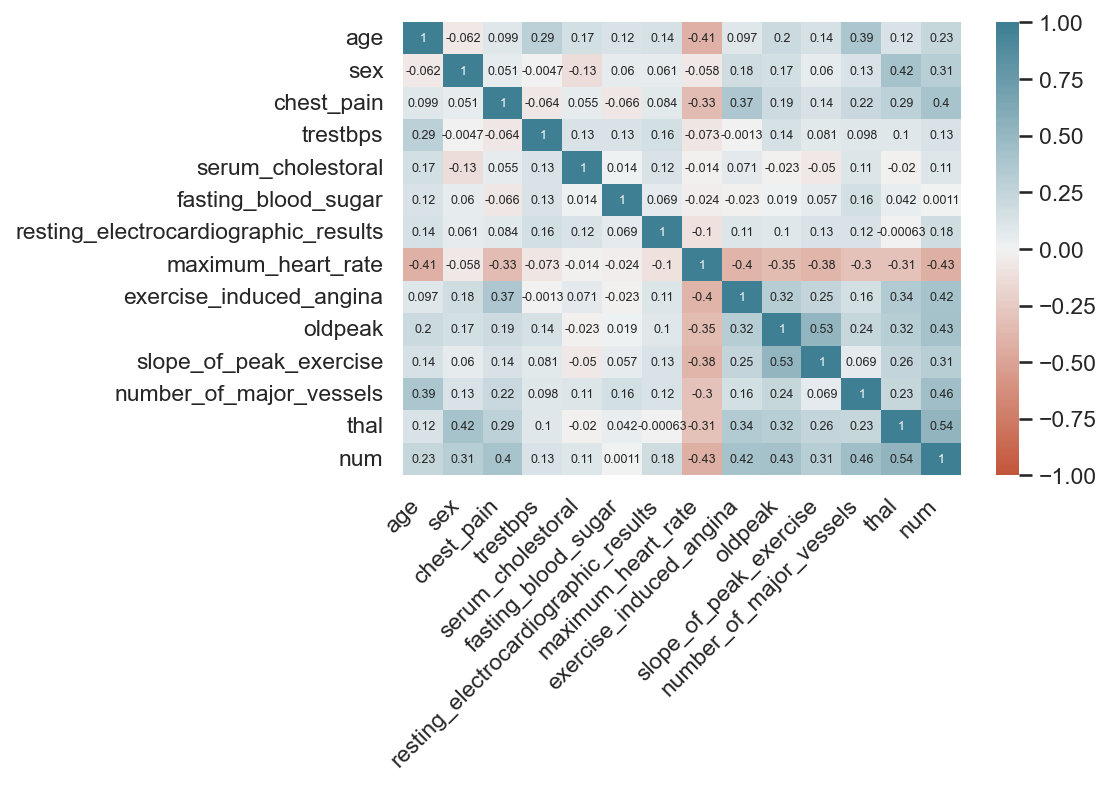

In [18]:
corr_plot(cleveland)

In [19]:
cleveland

age  sex chest_pain  trestbps  serum_cholestoral fasting_blood_sugar  \
0    63.0  1.0        1.0     145.0              233.0                 1.0   
1    67.0  1.0        4.0     160.0              286.0                 0.0   
2    67.0  1.0        4.0     120.0              229.0                 0.0   
3    37.0  1.0        3.0     130.0              250.0                 0.0   
4    41.0  0.0        2.0     130.0              204.0                 0.0   
..    ...  ...        ...       ...                ...                 ...   
292  57.0  0.0        4.0     140.0              241.0                 0.0   
293  45.0  1.0        1.0     110.0              264.0                 0.0   
294  68.0  1.0        4.0     144.0              193.0                 1.0   
295  57.0  1.0        4.0     130.0              131.0                 0.0   
296  57.0  0.0        2.0     130.0              236.0                 0.0   

    resting_electrocardiographic_results  maximum_heart_rate  \
0                                    2.0               150.0   
1                                    2.0               108.0   
2                                    2.0               129.0   
3                                    0.0               187.0   
4                                    2.0               172.0   
..                                   ...                 ...   
292                                  0.0               123.0   
293                                  0.0               132.0   
294                                  0.0               141.0   
295                                  0.0               115.0   
296                                  2.0               174.0   

    exercise_induced_angina  oldpeak slope_of_peak_exercise  \
0                       0.0      2.3                    3.0   
1                       1.0      1.5                    2.0   
2                       1.0      2.6                    2.0   
3                       0.0      3.5                    3.0   
4                       0.0      1.4                    1.0   
..                      ...      ...                    ...   
292                     1.0      0.2                    2.0   
293                     0.0      1.2                    2.0   
294                     0.0      3.4                    2.0   
295                     1.0      1.2                    2.0   
296                     0.0      0.0                    2.0   

    number_of_major_vessels thal num  
0                       0.0  6.0   0  
1                       3.0  3.0   1  
2                       2.0  7.0   1  
3                       0.0  3.0   0  
4                       0.0  3.0   0  
..                      ...  ...  ..  
292                     0.0  7.0   1  
293                     0.0  7.0   1  
294                     2.0  7.0   1  
295                     1.0  7.0   1  
296                     1.0  3.0   1  

[278 rows x 14 columns]

KeyboardInterrupt: 

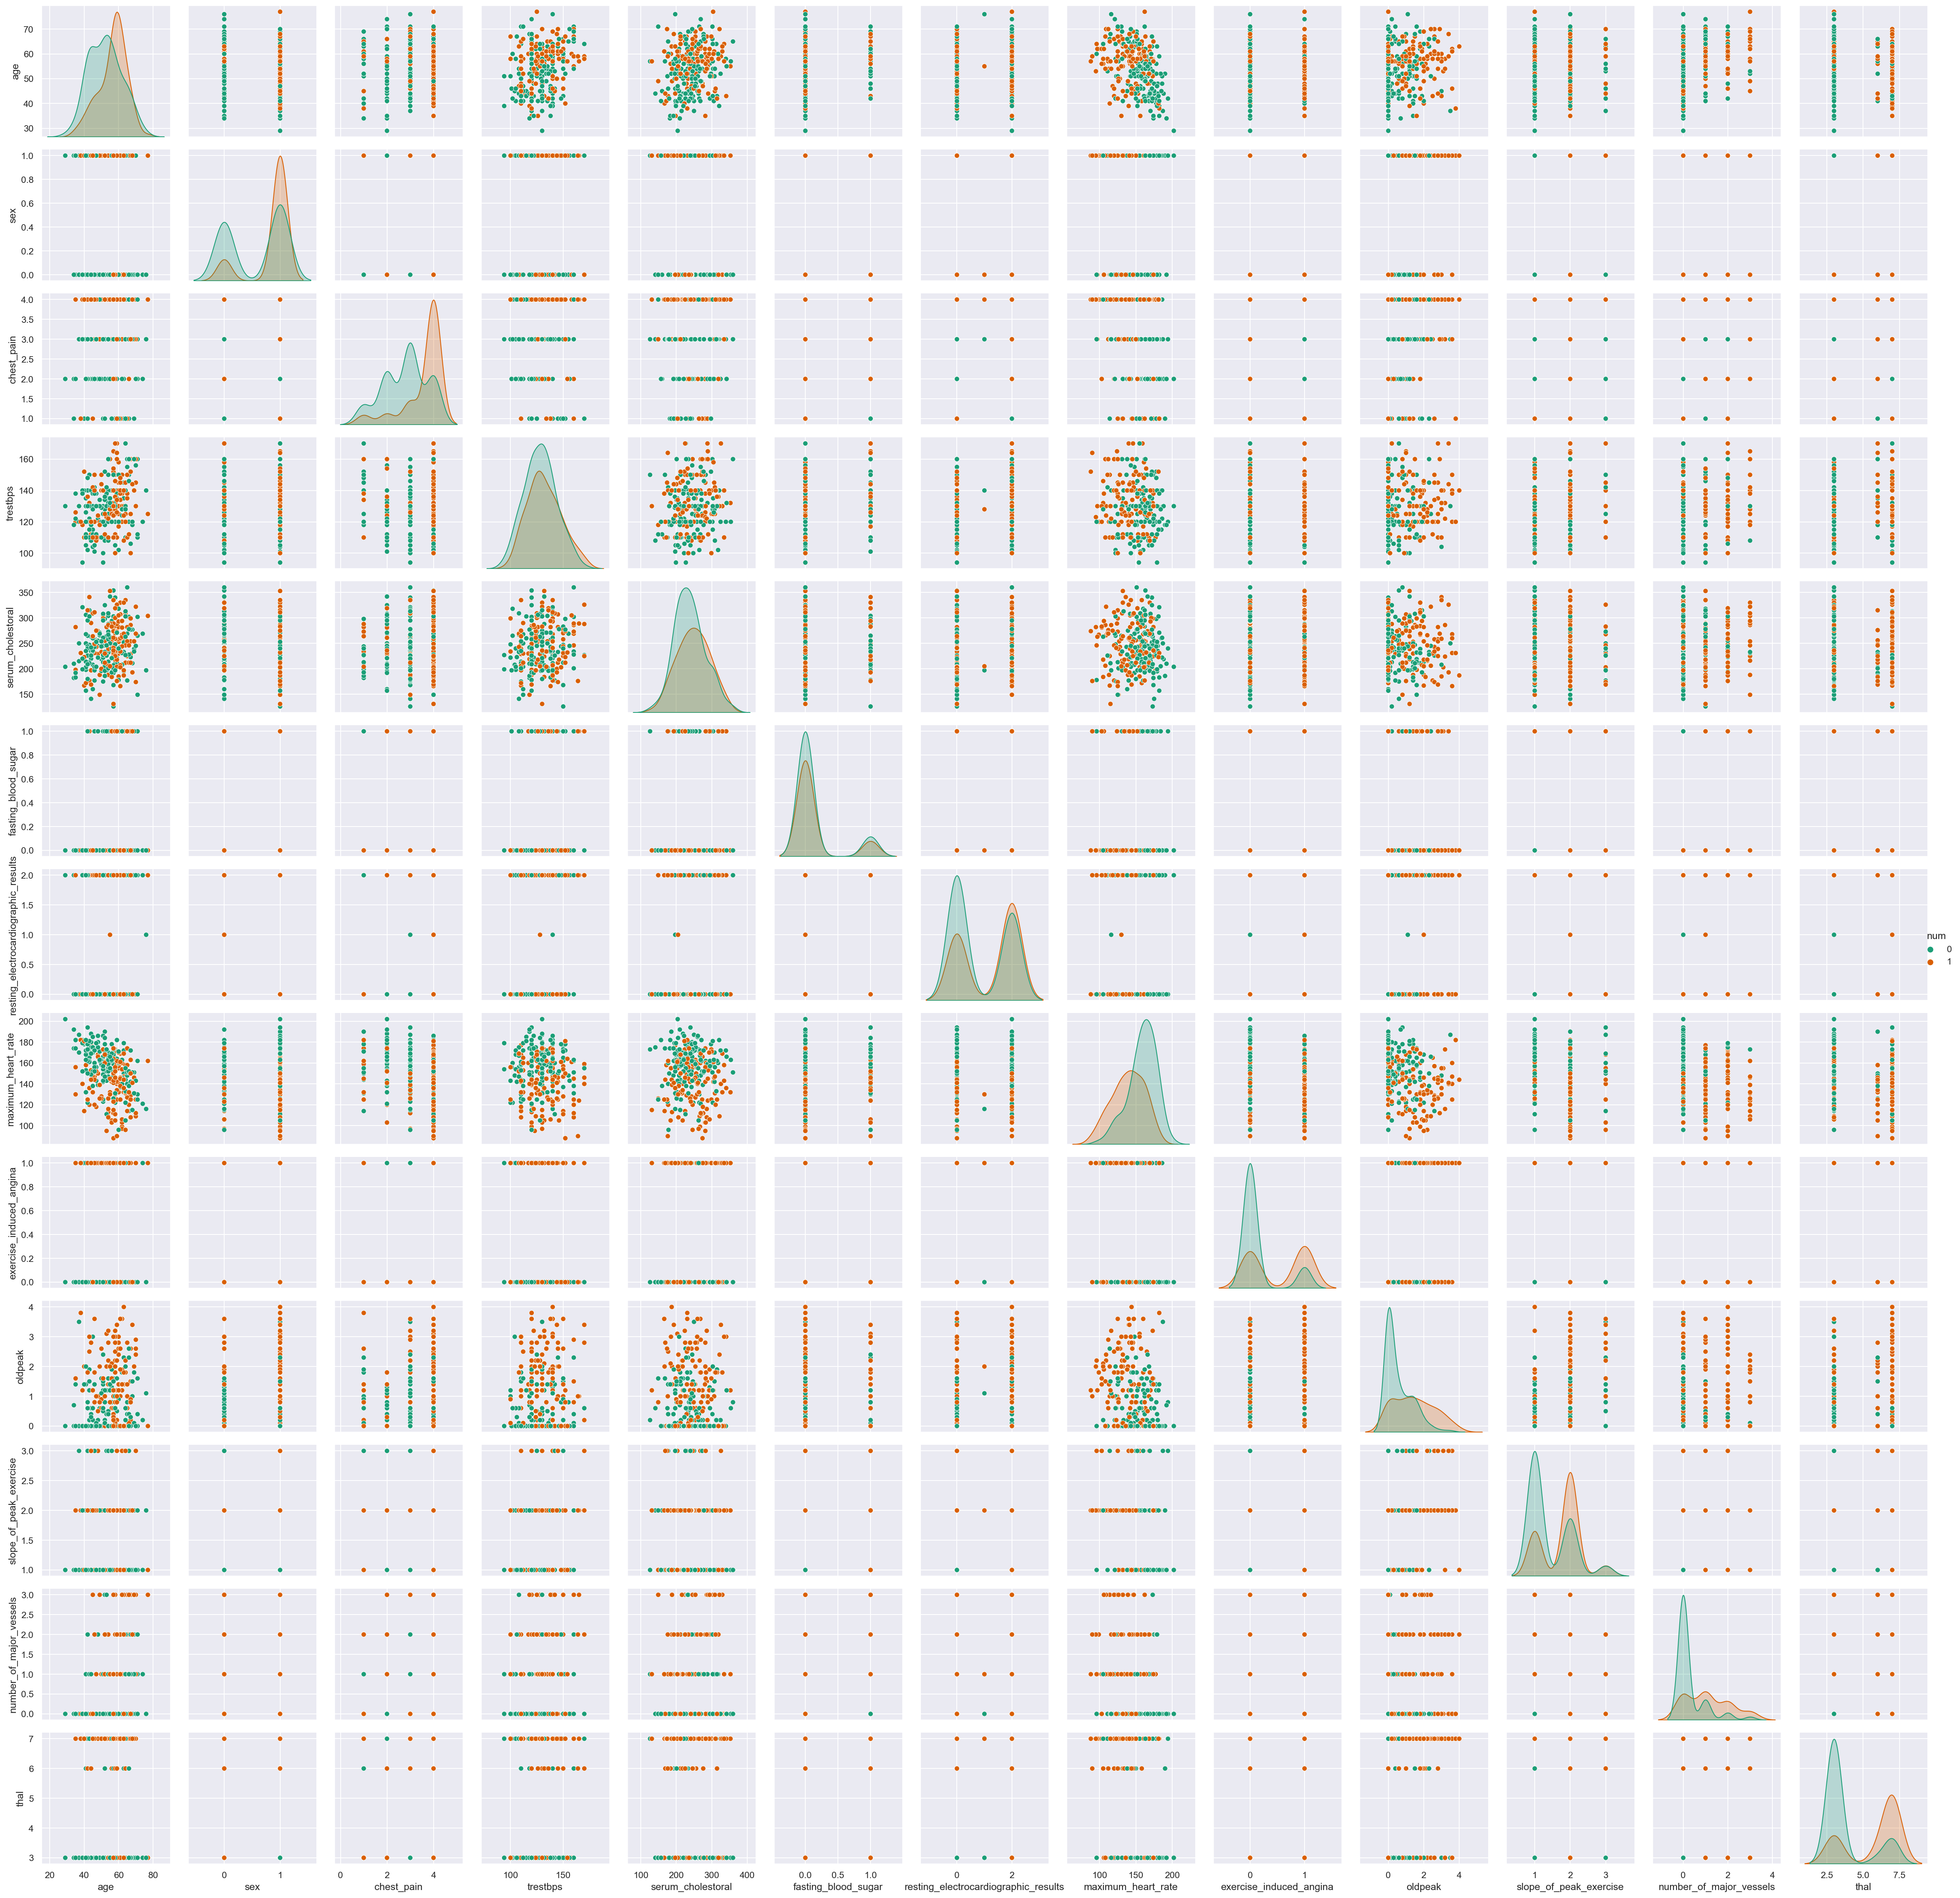

In [19]:
sns.pairplot(cleveland,hue='num',palette='Dark2')

In [20]:
plt.savefig('cleveland.png')

<Figure size 900x600 with 0 Axes>

## Model with categorical variables [cat and float]

In [21]:
#c = category
#n = numerical

#'trestbps' - n
#'serum_cholestoral' - n
#'maximum_heart_rate' - n
#'oldpeak' - n

#'age' - c should change to range eg. 0-18, 19-25, 26-40, 41-60, >60
#'sex' - c
#'chest_pain' - c
#'fasting_blood_sugar' - c
#'resting_electrocardiographic_results' - c
#'exercise_induced_angina' - c
#'slope_of_peak_exercise' - c
#'number_of_major_vessels' - c
#'thal' - c

In [20]:
cat_col = ['age', 
           'sex', 
           'chest_pain', 
           'fasting_blood_sugar', 
           'resting_electrocardiographic_results', 
           'exercise_induced_angina',
           'slope_of_peak_exercise',
           'number_of_major_vessels',
           'thal',
           'num']

for col_name in cat_col:
    cleveland[col_name] = pd.Categorical(cleveland[col_name])

### group age into age range

In [20]:
len(cleveland)

278

<AxesSubplot:>

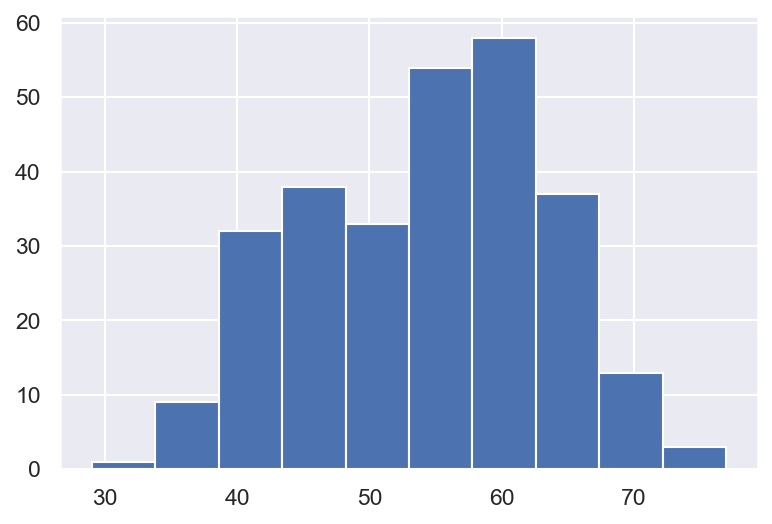

In [21]:
cleveland.age.hist()

In [21]:
cleveland['age'] = cleveland['age'].astype(int)
#cleveland.loc[(cleveland['age'] <= 25), 'age_range'] = 0
cleveland.loc[(cleveland['age'] > 25) & (cleveland['age'] <= 35), 'age_range'] = 1
cleveland.loc[(cleveland['age'] > 35) & (cleveland['age'] <= 45), 'age_range'] = 2
cleveland.loc[(cleveland['age'] > 45) & (cleveland['age'] <= 55), 'age_range'] = 3
cleveland.loc[(cleveland['age'] > 55) & (cleveland['age'] <= 65), 'age_range'] = 4
cleveland.loc[ cleveland['age'] > 65, 'age_range'] = 5
cleveland['age_range'] = pd.Categorical(cleveland['age_range'])

<AxesSubplot:>

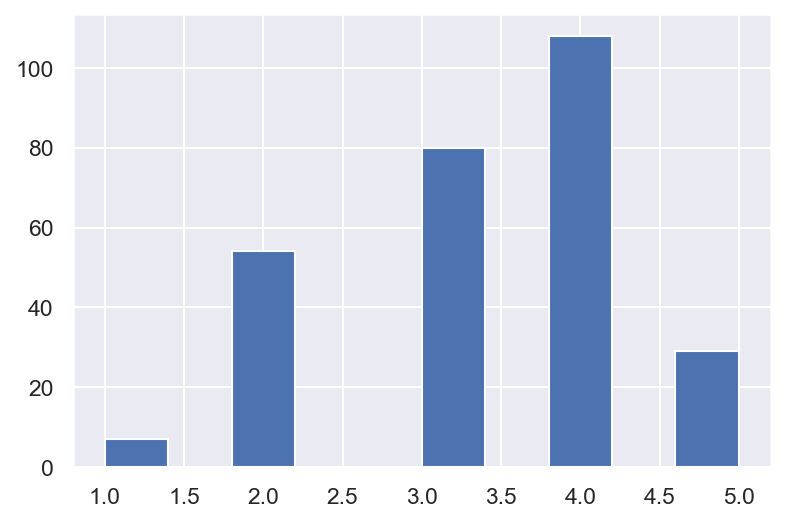

In [23]:
cleveland.age_range.hist()

In [24]:
cleveland['age_log'] = np.log(cleveland.age)

<AxesSubplot:>

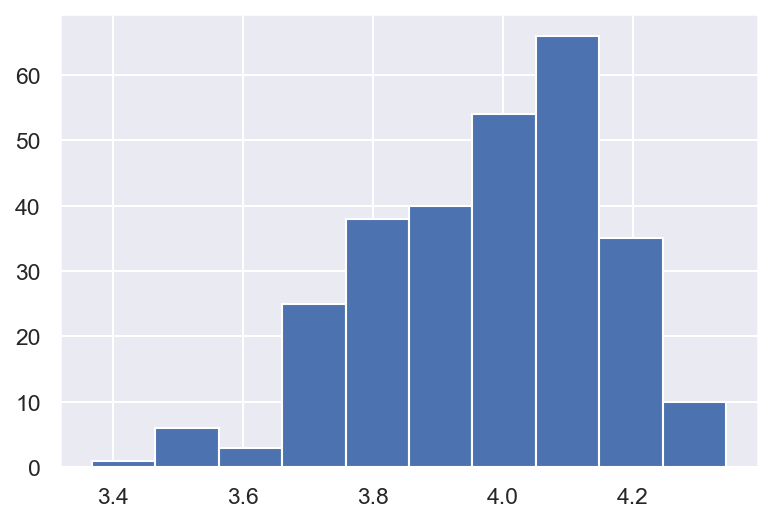

In [25]:
cleveland['age_log'].hist()

In [22]:
cleveland

age  sex chest_pain  trestbps  serum_cholestoral fasting_blood_sugar  \
0     63  1.0        1.0     145.0              233.0                 1.0   
1     67  1.0        4.0     160.0              286.0                 0.0   
2     67  1.0        4.0     120.0              229.0                 0.0   
3     37  1.0        3.0     130.0              250.0                 0.0   
4     41  0.0        2.0     130.0              204.0                 0.0   
..   ...  ...        ...       ...                ...                 ...   
292   57  0.0        4.0     140.0              241.0                 0.0   
293   45  1.0        1.0     110.0              264.0                 0.0   
294   68  1.0        4.0     144.0              193.0                 1.0   
295   57  1.0        4.0     130.0              131.0                 0.0   
296   57  0.0        2.0     130.0              236.0                 0.0   

    resting_electrocardiographic_results  maximum_heart_rate  \
0                                    2.0               150.0   
1                                    2.0               108.0   
2                                    2.0               129.0   
3                                    0.0               187.0   
4                                    2.0               172.0   
..                                   ...                 ...   
292                                  0.0               123.0   
293                                  0.0               132.0   
294                                  0.0               141.0   
295                                  0.0               115.0   
296                                  2.0               174.0   

    exercise_induced_angina  oldpeak slope_of_peak_exercise  \
0                       0.0      2.3                    3.0   
1                       1.0      1.5                    2.0   
2                       1.0      2.6                    2.0   
3                       0.0      3.5                    3.0   
4                       0.0      1.4                    1.0   
..                      ...      ...                    ...   
292                     1.0      0.2                    2.0   
293                     0.0      1.2                    2.0   
294                     0.0      3.4                    2.0   
295                     1.0      1.2                    2.0   
296                     0.0      0.0                    2.0   

    number_of_major_vessels thal num age_range  
0                       0.0  6.0   0       4.0  
1                       3.0  3.0   1       5.0  
2                       2.0  7.0   1       5.0  
3                       0.0  3.0   0       2.0  
4                       0.0  3.0   0       2.0  
..                      ...  ...  ..       ...  
292                     0.0  7.0   1       4.0  
293                     0.0  7.0   1       2.0  
294                     2.0  7.0   1       5.0  
295                     1.0  7.0   1       4.0  
296                     1.0  3.0   1       4.0  

[278 rows x 15 columns]

In [26]:
cleveland.dtypes

age                                        int64
sex                                      float64
chest_pain                               float64
trestbps                                 float64
serum_cholestoral                        float64
fasting_blood_sugar                      float64
resting_electrocardiographic_results     float64
maximum_heart_rate                       float64
exercise_induced_angina                  float64
oldpeak                                  float64
slope_of_peak_exercise                   float64
number_of_major_vessels                  float64
thal                                     float64
num                                        int64
age_range                               category
age_log                                  float64
dtype: object

In [27]:
from sklearn.model_selection import train_test_split

X = cleveland[['age_range', 'sex', 'chest_pain', 'trestbps', 'serum_cholestoral', 
             'fasting_blood_sugar', 'resting_electrocardiographic_results', 
             'maximum_heart_rate', 'exercise_induced_angina',
             'oldpeak', 'slope_of_peak_exercise', 'number_of_major_vessels', 'thal']]  # Features
y = cleveland['num']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # 70% training and 30% test

## Random Forest

In [28]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators=500, 
                             bootstrap=True,
                             criterion= 'entropy',
                             max_depth= None,
                             max_features= 'auto',
                             max_leaf_nodes= None,
                             min_impurity_decrease= 0.0,
                             min_impurity_split= None,
                             min_samples_leaf= 1,
                             min_samples_split= 2,
                             min_weight_fraction_leaf= 0.0,
                             n_jobs= 1,
                             oob_score= False,
                             random_state= 64,
                             verbose= 0,
                             warm_start= False)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
                       oob_score=False, random_state=64, verbose=0,
                       warm_start=False)

In [29]:
y_pred = clf.predict(X_test)

In [30]:
y_pred

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1])

### Evaluation

In [31]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [32]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8452380952380952


In [33]:
matrix = classification_report(y_test,y_pred,labels=[1,0])
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           1       0.85      0.78      0.82        37
           0       0.84      0.89      0.87        47

    accuracy                           0.85        84
   macro avg       0.85      0.84      0.84        84
weighted avg       0.85      0.85      0.84        84



In [34]:
df_confusion = pd.crosstab(y_test, y_pred)
df_confusion

col_0   0   1
num          
0      42   5
1       8  29

In [35]:
# evaluate a logistic regression model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# evaluate model
scores = cross_val_score(clf, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.824 (0.034)


### Save Model

In [103]:
import pickle

In [104]:
# save the model to disk
filename = 'first_dataset.sav'

In [105]:
pickle.dump(clf, open(filename, 'wb'))

In [106]:
loaded_model = pickle.load(open(filename, 'rb'))

In [107]:
y_pred = loaded_model.predict(X_test)

### Variables importance

In [36]:
clf.feature_importances_

array([0.07869896, 0.0268659 , 0.10296765, 0.0883691 , 0.10675003,
       0.00913196, 0.0280268 , 0.14615167, 0.02989622, 0.11035774,
       0.05081214, 0.11628974, 0.10568209])

In [37]:
sorted_idx = clf.feature_importances_.argsort()

<BarContainer object of 13 artists>

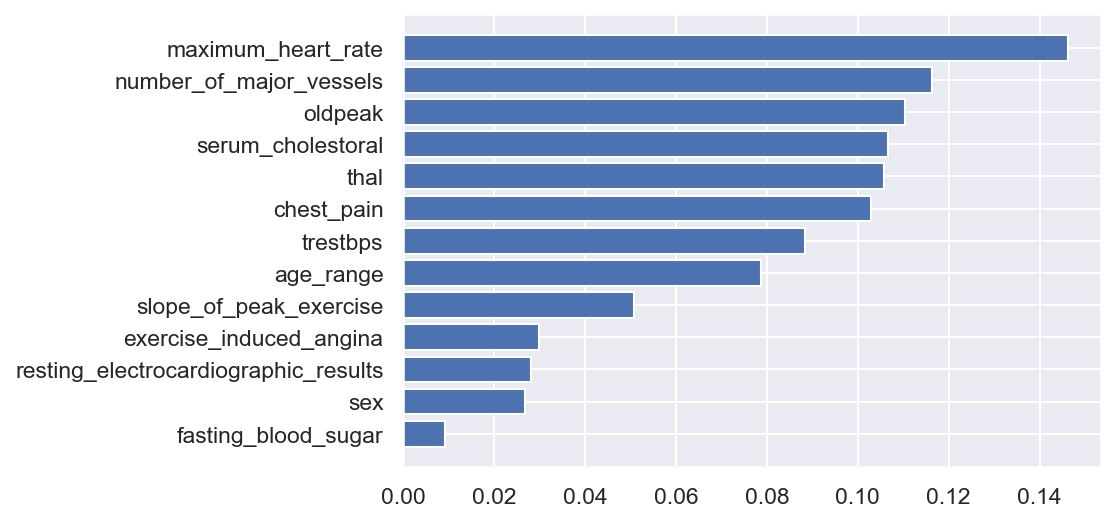

In [38]:
plt.barh(X.columns[sorted_idx], clf.feature_importances_[sorted_idx])

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [90]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

In [91]:
from sklearn.model_selection import train_test_split

X = cleveland[['age_range', 'sex', 'chest_pain', 'trestbps', 'serum_cholestoral', 
             'fasting_blood_sugar', 'resting_electrocardiographic_results', 
             'maximum_heart_rate', 'exercise_induced_angina',
             'oldpeak', 'slope_of_peak_exercise', 'number_of_major_vessels', 'thal']]  # Features
y = cleveland['num']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # 70% training and 30% test

In [92]:
voting_clf = VotingClassifier(estimators = [('log', log_clf), ('rnd', rnd_clf), ('svm', svm_clf)], voting = 'hard')

In [93]:
voting_clf.fit(X_train, y_train);

/Users/sutinantadalimavad/opt/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [94]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    np.random.seed(555)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    matrix = classification_report(y_test,y_pred,labels=[1,0])
    print('Classification report : \n',matrix)

/Users/sutinantadalimavad/opt/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/sutinantadalimavad/opt/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn

LogisticRegression 0.8452380952380952
Classification report : 
               precision    recall  f1-score   support

           1       0.83      0.81      0.82        37
           0       0.85      0.87      0.86        47

    accuracy                           0.85        84
   macro avg       0.84      0.84      0.84        84
weighted avg       0.84      0.85      0.84        84

RandomForestClassifier 0.8214285714285714
Classification report : 
               precision    recall  f1-score   support

           1       0.82      0.76      0.79        37
           0       0.82      0.87      0.85        47

    accuracy                           0.82        84
   macro avg       0.82      0.81      0.82        84
weighted avg       0.82      0.82      0.82        84

SVC 0.6428571428571429
Classification report : 
               precision    recall  f1-score   support

           1       0.65      0.41      0.50        37
           0       0.64      0.83      0.72        47

 

In [210]:
log_clf_tune = LogisticRegression(penalty = 'none',
                                  solver = 'lbfgs',
                                  l1_ratio = None,
                                  n_jobs=1,
                                  class_weight = dict)

rnd_clf_tune = RandomForestClassifier(n_estimators=150, 
                                 bootstrap=True,
                                 criterion= 'entropy',
                                 max_depth= None,
                                 max_features= 'auto',
                                 max_leaf_nodes= None,
                                 min_impurity_decrease= 0.0,
                                 min_impurity_split= None,
                                 min_samples_leaf= 1,
                                 min_samples_split= 2,
                                 min_weight_fraction_leaf= 0.0,
                                 n_jobs= 1,
                                 oob_score= False,
                                 random_state= 64,
                                 verbose= 0,
                                 warm_start= False)

svm_clf_tune = SVC(kernel = 'linear')

In [211]:
voting_clf_tune = VotingClassifier(estimators = [('log', log_clf_tune), ('rnd', rnd_clf_tune), ('svm', svm_clf_tune)], voting = 'hard')

In [212]:
voting_clf_tune.fit(X_train, y_train);

/Users/sutinantadalimavad/opt/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [213]:
from sklearn.metrics import accuracy_score
for clf in (log_clf_tune, rnd_clf_tune, svm_clf_tune, voting_clf_tune):
    np.random.seed(555)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    matrix = classification_report(y_test,y_pred,labels=[1,0])
    print('Classification report : \n',matrix)

/Users/sutinantadalimavad/opt/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression 0.8571428571428571
Classification report : 
               precision    recall  f1-score   support

           1       0.86      0.81      0.83        37
           0       0.86      0.89      0.88        47

    accuracy                           0.86        84
   macro avg       0.86      0.85      0.85        84
weighted avg       0.86      0.86      0.86        84

RandomForestClassifier 0.8452380952380952
Classification report : 
               precision    recall  f1-score   support

           1       0.85      0.78      0.82        37
           0       0.84      0.89      0.87        47

    accuracy                           0.85        84
   macro avg       0.85      0.84      0.84        84
weighted avg       0.85      0.85      0.84        84

SVC 0.8452380952380952
Classification report : 
               precision    recall  f1-score   support

           1       0.85      0.78      0.82        37
           0       0.84      0.89      0.87        47

 

/Users/sutinantadalimavad/opt/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


VotingClassifier 0.8452380952380952
Classification report : 
               precision    recall  f1-score   support

           1       0.85      0.78      0.82        37
           0       0.84      0.89      0.87        47

    accuracy                           0.85        84
   macro avg       0.85      0.84      0.84        84
weighted avg       0.85      0.85      0.84        84



# Second Dataset

In [61]:
heart_rec = pd.read_csv('heart_failure_clinical_records_dataset.csv')

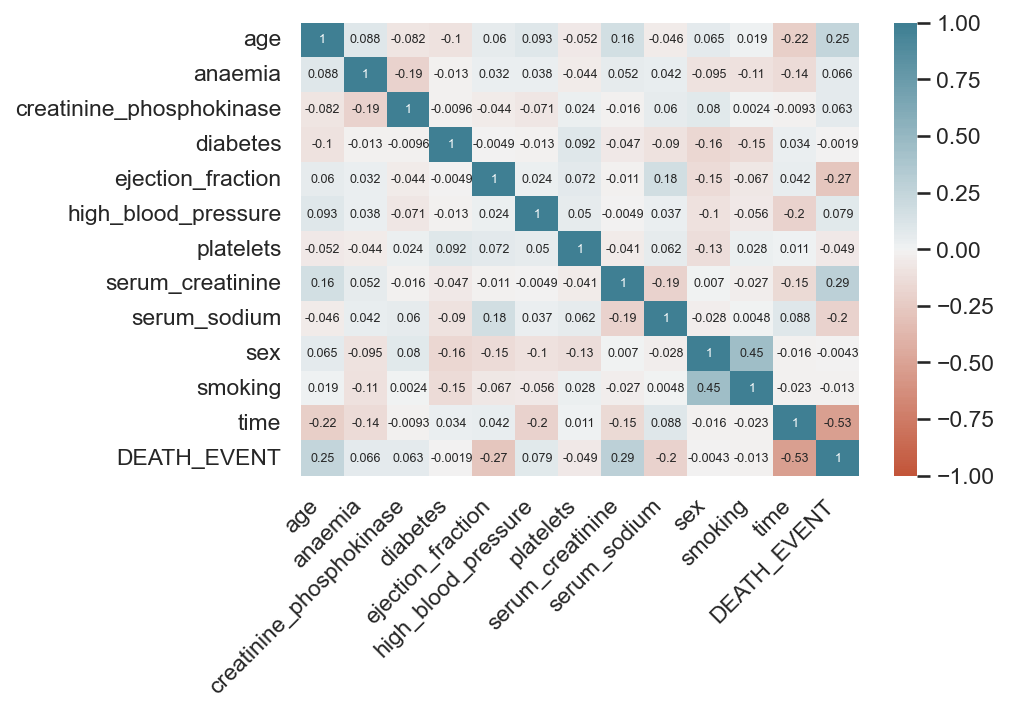

In [62]:
corr_plot(heart_rec)

In [7]:
#c = category
#n = numerical

#'creatinine_phosphokinase' - n
#'ejection_fraction' - n
#'platelets' - n
#'serum_creatinine' - n
#'serum_sodium' - n
#'time' - n

#'age' - c should change to range eg.
#'anaemia' - c
#'diabetes' - c
#'high_blood_pressure' - c
#'sex' - c
#'smoking' - c
#'DEATH_EVENT' - c

In [63]:
cat_col = ['age', 
           'anaemia', 
           'diabetes', 
           'high_blood_pressure', 
           'sex', 
           'smoking',
           'DEATH_EVENT']

for col_name in cat_col:
    heart_rec[col_name] = pd.Categorical(heart_rec[col_name])

In [64]:
heart_rec.isnull().values.any()

False

In [65]:
heart_rec.head(10)

age anaemia  creatinine_phosphokinase diabetes  ejection_fraction  \
0  75.0       0                       582        0                 20   
1  55.0       0                      7861        0                 38   
2  65.0       0                       146        0                 20   
3  50.0       1                       111        0                 20   
4  65.0       1                       160        1                 20   
5  90.0       1                        47        0                 40   
6  75.0       1                       246        0                 15   
7  60.0       1                       315        1                 60   
8  65.0       0                       157        0                 65   
9  80.0       1                       123        0                 35   

  high_blood_pressure  platelets  serum_creatinine  serum_sodium sex smoking  \
0                   1  265000.00               1.9           130   1       0   
1                   0  263358.03               1.1           136   1       0   
2                   0  162000.00               1.3           129   1       1   
3                   0  210000.00               1.9           137   1       0   
4                   0  327000.00               2.7           116   0       0   
5                   1  204000.00               2.1           132   1       1   
6                   0  127000.00               1.2           137   1       0   
7                   0  454000.00               1.1           131   1       1   
8                   0  263358.03               1.5           138   0       0   
9                   1  388000.00               9.4           133   1       1   

   time DEATH_EVENT  
0     4           1  
1     6           1  
2     7           1  
3     7           1  
4     8           1  
5     8           1  
6    10           1  
7    10           1  
8    10           1  
9    10           1

<AxesSubplot:>

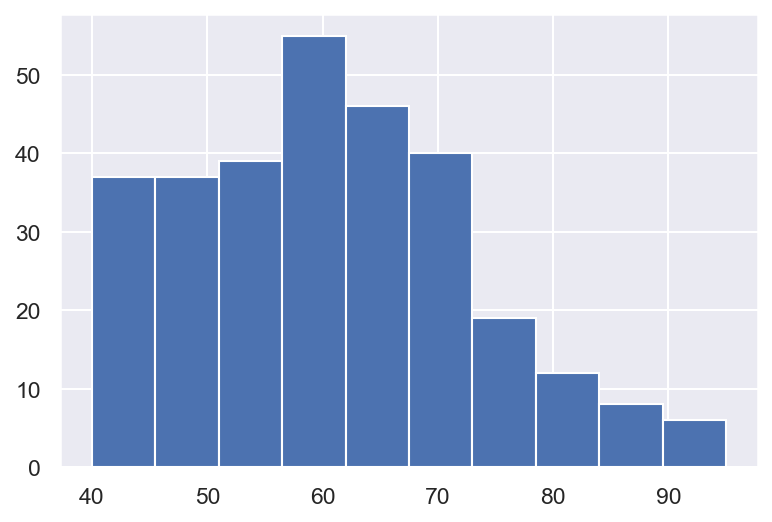

In [66]:
heart_rec.age.hist()

In [67]:
heart_rec['age'] = heart_rec['age'].astype(int)
#cleveland.loc[(cleveland['age'] <= 25), 'age_range'] = 0
heart_rec.loc[(heart_rec['age'] >= 40) & (heart_rec['age'] <= 50), 'age_range'] = 1
heart_rec.loc[(heart_rec['age'] > 50) & (heart_rec['age'] <= 60), 'age_range'] = 2
heart_rec.loc[(heart_rec['age'] > 60) & (heart_rec['age'] <= 70), 'age_range'] = 3
heart_rec.loc[(heart_rec['age'] > 70) & (heart_rec['age'] <= 80), 'age_range'] = 4
heart_rec.loc[ heart_rec['age'] > 80, 'age_range'] = 5
heart_rec['age_range'] = pd.Categorical(heart_rec['age_range'])

<AxesSubplot:>

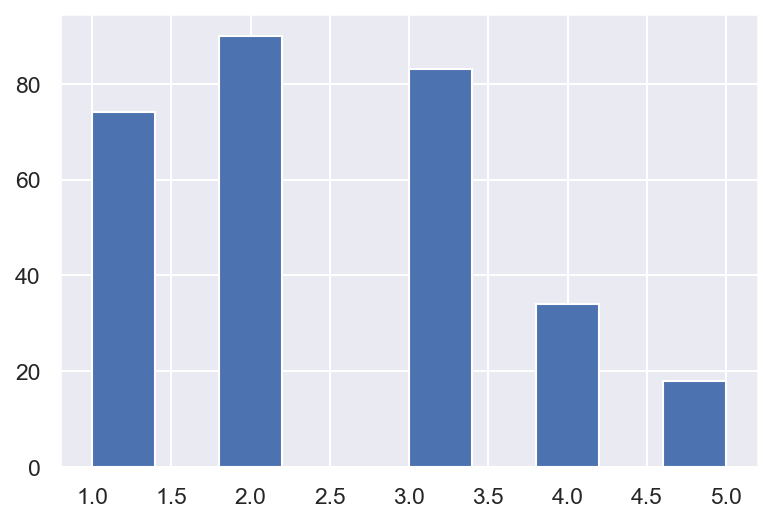

In [68]:
heart_rec.age_range.hist()

In [69]:
heart_rec['age_log'] = np.log(heart_rec.age)

In [70]:
heart_rec['age_log']

0      4.317488
1      4.007333
2      4.174387
3      3.912023
4      4.174387
         ...   
294    4.127134
295    4.007333
296    3.806662
297    3.806662
298    3.912023
Name: age_log, Length: 299, dtype: float64

<AxesSubplot:>

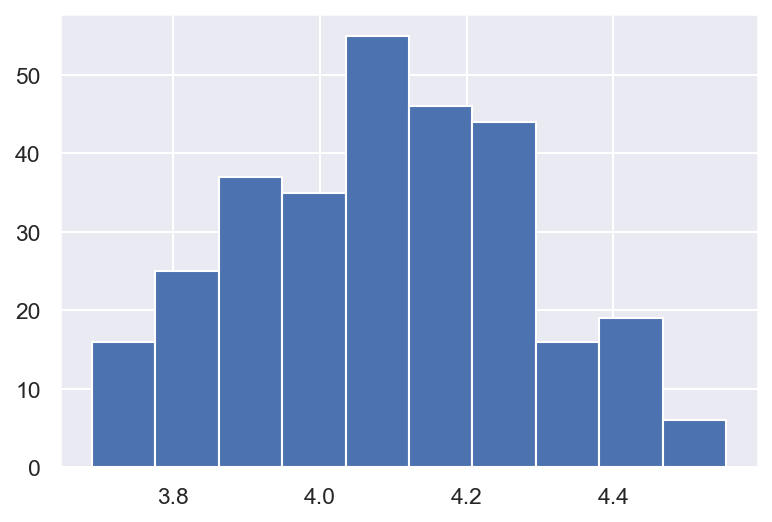

In [71]:
heart_rec['age_log'].hist()

In [72]:
heart_rec.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [73]:
heart_rec.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT', 'age_range', 'age_log'],
      dtype='object')

## Model for dataset2

In [74]:
from sklearn.model_selection import train_test_split

X = heart_rec[['age_log', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']]  # Features
y = heart_rec['DEATH_EVENT']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [75]:
y_test.count(y_test = 0)

TypeError: count() got an unexpected keyword argument 'y_test'

In [20]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf2 = RandomForestClassifier(n_estimators=150, 
                             bootstrap=True,
                             criterion= 'entropy',
                             max_depth= None,
                             max_features= 'auto',
                             max_leaf_nodes= None,
                             min_impurity_decrease= 0.0,
                             min_impurity_split= None,
                             min_samples_leaf= 1,
                             min_samples_split= 2,
                             min_weight_fraction_leaf= 0.0,
                             n_jobs= 1,
                             oob_score= False,
                             random_state= 64,
                             verbose= 0,
                             warm_start= False)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf2.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
                       oob_score=False, random_state=64, verbose=0,
                       warm_start=False)

In [21]:
y_pred = clf2.predict(X_test)

In [22]:
y_pred

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1])

### Variables importance

In [23]:
clf2.feature_importances_

array([0.09452148, 0.01372553, 0.08112486, 0.01672521, 0.11924095,
       0.01383438, 0.07366107, 0.14757549, 0.0777341 , 0.01835734,
       0.01202528, 0.33147433])

In [24]:
sorted_idx_2 = clf2.feature_importances_.argsort()

<BarContainer object of 12 artists>

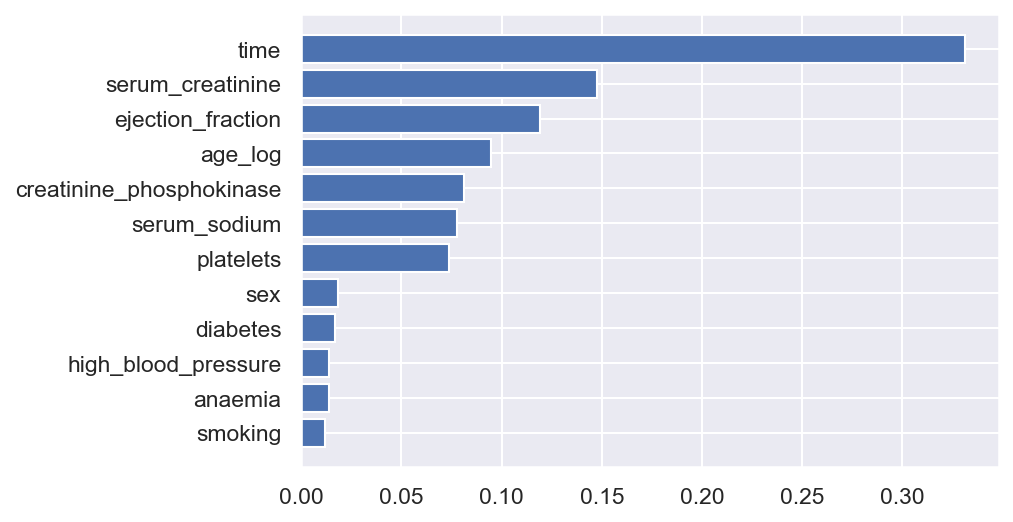

In [25]:
plt.barh(X.columns[sorted_idx_2], clf2.feature_importances_[sorted_idx_2])

## Evaluation

In [26]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [27]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8777777777777778


In [28]:
matrix = classification_report(y_test,y_pred,labels=[1,0])
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           1       0.85      0.77      0.81        30
           0       0.89      0.93      0.91        60

    accuracy                           0.88        90
   macro avg       0.87      0.85      0.86        90
weighted avg       0.88      0.88      0.88        90



In [29]:
df_confusion = pd.crosstab(y_test, y_pred)
df_confusion

col_0         0   1
DEATH_EVENT        
0            56   4
1             7  23

In [76]:
# evaluate a logistic regression model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# evaluate model
scores = cross_val_score(clf2, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

NameError: name 'clf2' is not defined

In [31]:
heart_rec.dtypes

age                            int64
anaemia                     category
creatinine_phosphokinase       int64
diabetes                    category
ejection_fraction              int64
high_blood_pressure         category
platelets                    float64
serum_creatinine             float64
serum_sodium                   int64
sex                         category
smoking                     category
time                           int64
DEATH_EVENT                 category
age_range                   category
age_log                      float64
dtype: object

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [214]:
log_clf_2 = LogisticRegression()
rnd_clf_2 = RandomForestClassifier()
svm_clf_2 = SVC()

In [215]:
from sklearn.model_selection import train_test_split

X = heart_rec[['age_log', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']]  # Features
y = heart_rec['DEATH_EVENT']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 90% training and 10% test

In [216]:
heart_rec.DEATH_EVENT

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: category
Categories (2, int64): [0, 1]

In [217]:
voting_clf_2 = VotingClassifier(estimators = [('log', log_clf_2), ('rnd', rnd_clf_2), ('svm', svm_clf_2)], voting = 'hard')

In [218]:
voting_clf_2.fit(X_train, y_train);

In [219]:
from sklearn.metrics import accuracy_score
for clf in (log_clf_2, rnd_clf_2, svm_clf_2, voting_clf_2):
    np.random.seed(555)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    matrix = classification_report(y_test,y_pred,labels=[1,0])
    print('Classification report : \n',matrix)

LogisticRegression 0.8111111111111111
Classification report : 
               precision    recall  f1-score   support

           1       0.71      0.58      0.64        26
           0       0.84      0.91      0.87        64

    accuracy                           0.81        90
   macro avg       0.78      0.74      0.76        90
weighted avg       0.80      0.81      0.80        90

RandomForestClassifier 0.8888888888888888
Classification report : 
               precision    recall  f1-score   support

           1       0.79      0.85      0.81        26
           0       0.94      0.91      0.92        64

    accuracy                           0.89        90
   macro avg       0.86      0.88      0.87        90
weighted avg       0.89      0.89      0.89        90

SVC 0.7111111111111111
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        26
           0       0.71      1.00      0.83        64

 

/Users/sutinantadalimavad/opt/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


VotingClassifier 0.8555555555555555
Classification report : 
               precision    recall  f1-score   support

           1       0.88      0.58      0.70        26
           0       0.85      0.97      0.91        64

    accuracy                           0.86        90
   macro avg       0.87      0.77      0.80        90
weighted avg       0.86      0.86      0.85        90



In [241]:
log_clf_2_tune = LogisticRegression(penalty = 'none',
                                  solver = 'lbfgs',
                                  l1_ratio = None,
                                  n_jobs=1,
                                  class_weight = dict)

rnd_clf_2_tune = RandomForestClassifier(n_estimators=150, 
                                 bootstrap=True,
                                 criterion= 'entropy',
                                 max_depth= None,
                                 max_features= 'auto',
                                 max_leaf_nodes= None,
                                 min_impurity_decrease= 0.0,
                                 min_impurity_split= None,
                                 min_samples_leaf= 1,
                                 min_samples_split= 2,
                                 min_weight_fraction_leaf= 0.0,
                                 n_jobs= 1,
                                 oob_score= False,
                                 random_state= 64,
                                 verbose= 0,
                                 warm_start= False)

svm_clf_2_tune = SVC(kernel = 'linear')

In [242]:
voting_clf_2_tune = VotingClassifier(estimators = [('log', log_clf_2_tune), ('rnd', rnd_clf_2_tune), ('svm', svm_clf_2_tune)], voting = 'hard')

In [243]:
voting_clf_2_tune.fit(X_train, y_train);

/Users/sutinantadalimavad/opt/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [244]:
from sklearn.metrics import accuracy_score
for clf in (log_clf_2_tune, rnd_clf_2_tune, svm_clf_2_tune, voting_clf_2_tune):
    np.random.seed(555)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    matrix = classification_report(y_test,y_pred,labels=[1,0])
    print('Classification report : \n',matrix)

/Users/sutinantadalimavad/opt/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression 0.8666666666666667
Classification report : 
               precision    recall  f1-score   support

           1       0.77      0.77      0.77        26
           0       0.91      0.91      0.91        64

    accuracy                           0.87        90
   macro avg       0.84      0.84      0.84        90
weighted avg       0.87      0.87      0.87        90

RandomForestClassifier 0.8888888888888888
Classification report : 
               precision    recall  f1-score   support

           1       0.81      0.81      0.81        26
           0       0.92      0.92      0.92        64

    accuracy                           0.89        90
   macro avg       0.86      0.86      0.86        90
weighted avg       0.89      0.89      0.89        90

SVC 0.7888888888888889
Classification report : 
               precision    recall  f1-score   support

           1       0.61      0.77      0.68        26
           0       0.89      0.80      0.84        64

 

/Users/sutinantadalimavad/opt/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


VotingClassifier 0.8777777777777778
Classification report : 
               precision    recall  f1-score   support

           1       0.78      0.81      0.79        26
           0       0.92      0.91      0.91        64

    accuracy                           0.88        90
   macro avg       0.85      0.86      0.85        90
weighted avg       0.88      0.88      0.88        90



# Third Dataset

In [4]:
heart_rec2 = pd.read_csv('heart.csv')

In [5]:
heart_rec2.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [247]:
#c = category
#n = numerical

#'trtbps' - n
#'chol' - n
#'thalachh' - n
#'oldpeak' - n

#'age' - c should change to range eg.
#'sex' - c
#'cp' - c
#'fbs' - c
#'restecg' - c
#'exng' - c
#'slp' - c
#'caa' - c
#'thall' - c
#'output' - c

In [7]:
cat_col = ['age',
           'sex',
           'cp',
           'fbs',
           'restecg',
           'exng',
           'slp',
           'caa',
           'thall',
           'output']

for col_name in cat_col:
    heart_rec2[col_name] = pd.Categorical(heart_rec2[col_name])

In [254]:
len(heart_rec2)

303

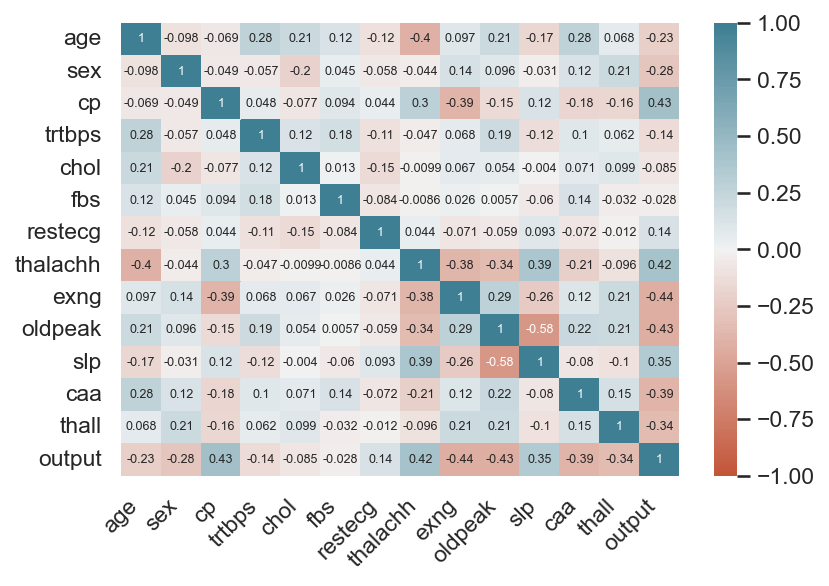

In [6]:
corr_plot(heart_rec2)

In [8]:
heart_rec2.head(10)

age sex cp  trtbps  chol fbs restecg  thalachh exng  oldpeak slp caa thall  \
0  63   1  3     145   233   1       0       150    0      2.3   0   0     1   
1  37   1  2     130   250   0       1       187    0      3.5   0   0     2   
2  41   0  1     130   204   0       0       172    0      1.4   2   0     2   
3  56   1  1     120   236   0       1       178    0      0.8   2   0     2   
4  57   0  0     120   354   0       1       163    1      0.6   2   0     2   
5  57   1  0     140   192   0       1       148    0      0.4   1   0     1   
6  56   0  1     140   294   0       0       153    0      1.3   1   0     2   
7  44   1  1     120   263   0       1       173    0      0.0   2   0     3   
8  52   1  2     172   199   1       1       162    0      0.5   2   0     3   
9  57   1  2     150   168   0       1       174    0      1.6   2   0     2   

  output  
0      1  
1      1  
2      1  
3      1  
4      1  
5      1  
6      1  
7      1  
8      1  
9      1

## Model for dataset 3

In [256]:
from sklearn.model_selection import train_test_split

X = heart_rec2[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
                'exng', 'oldpeak', 'slp', 'caa', 'thall']]  # Features
y = heart_rec2['output']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [165]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf3 = RandomForestClassifier(n_estimators=150, 
                             bootstrap=True,
                             criterion= 'entropy',
                             max_depth= None,
                             max_features= 'auto',
                             max_leaf_nodes= None,
                             min_impurity_decrease= 0.0,
                             min_impurity_split= None,
                             min_samples_leaf= 1,
                             min_samples_split= 2,
                             min_weight_fraction_leaf= 0.0,
                             n_jobs= 1,
                             oob_score= False,
                             random_state= 64,
                             verbose= 0,
                             warm_start= False)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf3.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
                       oob_score=False, random_state=64, verbose=0,
                       warm_start=False)

In [166]:
y_pred = clf3.predict(X_test)

In [167]:
y_pred

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1])

### Variables importance

In [168]:
clf3.feature_importances_

array([0.1097773 , 0.03070548, 0.11009401, 0.09266287, 0.10024364,
       0.01153319, 0.02351548, 0.12433125, 0.03941114, 0.11092924,
       0.03890413, 0.0992092 , 0.10868307])

In [169]:
sorted_idx_3 = clf3.feature_importances_.argsort()

<BarContainer object of 13 artists>

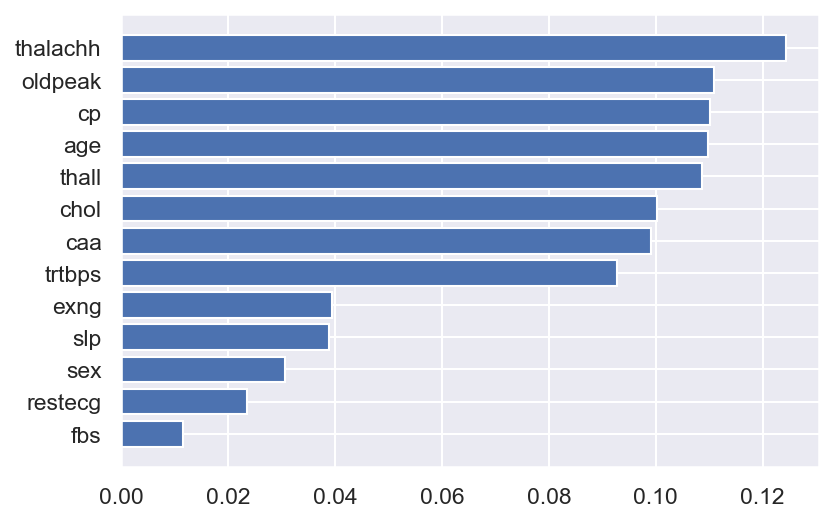

In [170]:
plt.barh(X.columns[sorted_idx_3], clf3.feature_importances_[sorted_idx_3])

## Evaluation

In [171]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [172]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8461538461538461


In [173]:
matrix = classification_report(y_test,y_pred,labels=[1,0])
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           1       0.89      0.86      0.87        56
           0       0.78      0.83      0.81        35

    accuracy                           0.85        91
   macro avg       0.84      0.84      0.84        91
weighted avg       0.85      0.85      0.85        91



In [174]:
df_confusion = pd.crosstab(y_test, y_pred)
df_confusion

col_0    0   1
output        
0       29   6
1        8  48

In [175]:
# evaluate a logistic regression model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# evaluate model
scores = cross_val_score(clf3, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.829 (0.096)


In [257]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [258]:
log_clf_3 = LogisticRegression()
rnd_clf_3 = RandomForestClassifier()
svm_clf_3 = SVC()

In [259]:
from sklearn.model_selection import train_test_split

X = heart_rec2[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
                'exng', 'oldpeak', 'slp', 'caa', 'thall']]  # Features
y = heart_rec2['output']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [260]:
voting_clf_3 = VotingClassifier(estimators = [('log', log_clf_3), ('rnd', rnd_clf_3), ('svm', svm_clf_3)], voting = 'hard')

In [261]:
voting_clf_3.fit(X_train, y_train);

/Users/sutinantadalimavad/opt/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [262]:
from sklearn.metrics import accuracy_score
for clf in (log_clf_3, rnd_clf_3, svm_clf_3, voting_clf_3):
    np.random.seed(555)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    matrix = classification_report(y_test,y_pred,labels=[1,0])
    print('Classification report : \n',matrix)

/Users/sutinantadalimavad/opt/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression 0.7472527472527473
Classification report : 
               precision    recall  f1-score   support

           1       0.69      0.86      0.76        43
           0       0.84      0.65      0.73        48

    accuracy                           0.75        91
   macro avg       0.76      0.75      0.75        91
weighted avg       0.77      0.75      0.75        91

RandomForestClassifier 0.7802197802197802
Classification report : 
               precision    recall  f1-score   support

           1       0.72      0.88      0.79        43
           0       0.87      0.69      0.77        48

    accuracy                           0.78        91
   macro avg       0.79      0.79      0.78        91
weighted avg       0.80      0.78      0.78        91

SVC 0.5824175824175825
Classification report : 
               precision    recall  f1-score   support

           1       0.54      0.79      0.64        43
           0       0.68      0.40      0.50        48

 

/Users/sutinantadalimavad/opt/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [297]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.22.1.


In [291]:
log_clf_3_tune = LogisticRegression(penalty = 'none',
                                  solver = 'lbfgs',
                                  l1_ratio = None,
                                  n_jobs=1,
                                  class_weight = dict)

rnd_clf_3_tune = RandomForestClassifier(n_estimators=150, 
                                 bootstrap=True,
                                 criterion= 'entropy',
                                 max_depth= None,
                                 max_features= 'auto',
                                 max_leaf_nodes= None,
                                 min_impurity_decrease= 0.0,
                                 min_impurity_split= None,
                                 min_samples_leaf= 1,
                                 min_samples_split= 2,
                                 min_weight_fraction_leaf= 0.0,
                                 n_jobs= 1,
                                 oob_score= False,
                                 random_state= 64,
                                 verbose= 0,
                                 warm_start= True)

svm_clf_3_tune = SVC(kernel = 'linear')

In [292]:
voting_clf_3_tune = VotingClassifier(estimators = [('log', log_clf_3_tune), ('rnd', rnd_clf_3_tune), ('svm', svm_clf_3_tune)], voting = 'hard')

In [293]:
voting_clf_3_tune.fit(X_train, y_train);

/Users/sutinantadalimavad/opt/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
/Users/sutinantadalimavad/opt/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [294]:
from sklearn.metrics import accuracy_score
for clf in (log_clf_3_tune, rnd_clf_3_tune, svm_clf_3_tune, voting_clf_3_tune):
    np.random.seed(555)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    matrix = classification_report(y_test,y_pred,labels=[1,0])
    print('Classification report : \n',matrix)

/Users/sutinantadalimavad/opt/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
/Users/sutinantadalimavad/opt/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression 0.6593406593406593
Classification report : 
               precision    recall  f1-score   support

           1       0.62      0.74      0.67        43
           0       0.72      0.58      0.64        48

    accuracy                           0.66        91
   macro avg       0.67      0.66      0.66        91
weighted avg       0.67      0.66      0.66        91

RandomForestClassifier 0.7692307692307693
Classification report : 
               precision    recall  f1-score   support

           1       0.70      0.88      0.78        43
           0       0.86      0.67      0.75        48

    accuracy                           0.77        91
   macro avg       0.78      0.78      0.77        91
weighted avg       0.79      0.77      0.77        91

SVC 0.7472527472527473
Classification report : 
               precision    recall  f1-score   support

           1       0.69      0.86      0.76        43
           0       0.84      0.65      0.73        48

 

/Users/sutinantadalimavad/opt/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
/Users/sutinantadalimavad/opt/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


VotingClassifier 0.7582417582417582
Classification report : 
               precision    recall  f1-score   support

           1       0.69      0.88      0.78        43
           0       0.86      0.65      0.74        48

    accuracy                           0.76        91
   macro avg       0.78      0.76      0.76        91
weighted avg       0.78      0.76      0.76        91

